<a href="https://colab.research.google.com/github/hemz990/fyp/blob/main/Upscaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/personal/"

In [ ]:
! kaggle datasets download -d joe1995/div2k-dataset

 56% 2.08G/3.71G [01:52<01:28, 19.8MB/s]
User cancelled operation


In [ ]:
!unzip div2k-dataset.zip

Archive:  div2k-dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of div2k-dataset.zip or
        div2k-dataset.zip.zip, and cannot find div2k-dataset.zip.ZIP, period.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Conv2DTranspose

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(9,9),padding="same", activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(9,9),padding="same", activation="relu"))
# model.add(Conv2D(filters=16,kernel_size=(9,9),padding="same", activation="relu"))
model.add(Conv2DTranspose(16, (2,2), strides=2, padding="same"))
model.add(Conv2D(filters=16,kernel_size=(6,6),padding="same", activation="relu"))
model.add(Conv2D(filters=8,kernel_size=(6,6),padding="same", activation="relu"))
model.add(Conv2DTranspose(16, (2,2), strides=2, padding="same"))
# model.add(Conv2D(filters=4,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=4,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=4,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(6,6),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=8,kernel_size=(6,6),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(9,9),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(9,9),padding="same", activation="relu"))
model.add(Conv2D(filters=3,kernel_size=(3,3),padding="same", activation="relu"))


In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,UpSampling2D, Add, Dropout


Input_img = Input(shape=(256, 256, 3))


#encoding architecture
x1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(Input_img)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x1)
x3 = MaxPool2D(padding='same')(x2)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x3)
x5 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x4)
x6 = MaxPool2D(padding='same')(x5)
encoded = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x6)
#encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)# decoding architecture
x7 = UpSampling2D()(encoded)
x8 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x7)
x9 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x8)
x10 = Add()([x5, x9])
x11 = UpSampling2D()(x10)
x12 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x11)
x13 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x12)
x14 = Add()([x2, x13])
x14 = UpSampling2D((2, 2))(x14)
# x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
# x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l1(10e-10))(x14)
autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
autoencoder.fit(LR1,HR1,epochs=100,batch_size=1)

Epoch 1/100
800/800 [==============================] - 44s 37ms/step - loss: 0.0182 - accuracy: 0.7827
Epoch 2/100
800/800 [==============================] - 30s 38ms/step - loss: 0.0161 - accuracy: 0.8064
Epoch 3/100
800/800 [==============================] - 31s 39ms/step - loss: 0.0156 - accuracy: 0.8160
Epoch 4/100
800/800 [==============================] - 30s 38ms/step - loss: 0.0155 - accuracy: 0.8197
Epoch 5/100
800/800 [==============================] - 30s 38ms/step - loss: 0.0158 - accuracy: 0.8073
Epoch 6/100
800/800 [==============================] - 30s 38ms/step - loss: 0.0154 - accuracy: 0.8247
Epoch 7/100
800/800 [==============================] - 30s 38ms/step - loss: 0.0154 - accuracy: 0.8175
Epoch 8/100
800/800 [==============================] - 30s 38ms/step - loss: 0.0153 - accuracy: 0.8190
Epoch 9/100
800/800 [==============================] - 30s 37ms/step - loss: 0.0152 - accuracy: 0.8161
Epoch 10/100
800/800 [==============================] - 30s 38ms/step - l

In [3]:
import numpy as np
import cv2
import glob
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Add, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from multiprocessing import Pool
import pickle

In [ ]:
face_images = sorted(glob.glob('/content/DIV2K_train_HR/DIV2K_train_HR/*.png'))
print(len(face_images))

def read(path):
  img = load_img(path, target_size=(256,256,3))
  img = img_to_array(img)
  img = img/255.
  # progress.update(1)
  return img
p= Pool(10)
img_array = p.map(read, face_images)

0


In [2]:
cp /content/drive/MyDrive/personal/img_array_5.pickle /content

In [ ]:
cp /content/img_array_5.pickle  /content/drive/MyDrive/personal

cp: cannot stat '/content/img_array_5.pickle': No such file or directory


In [ ]:
with open('img_array_4.pickle','wb') as f:
  pickle.dump(img_array, f)
  print(len(img_array))

100


In [4]:
with open('img_array_5.pickle','rb') as f:
  img_array = pickle.load(f)
  print(len(img_array))

800


In [ ]:
print(img_array[0].shape)

(256, 256, 3)


In [5]:
all_images = np.array(img_array)
train_x, val_x = train_test_split(all_images, random_state = 32, test_size=0.2)

In [1]:
def pixalate_image(image, scale_percent = 50):
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)
  small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

  width = int(small_image.shape[1] * 100 / scale_percent)
  height = int(small_image.shape[0] * 100 / scale_percent)
  dim = (width, height)
  low_res_image = cv2.resize(small_image, dim, interpolation =  cv2.INTER_AREA)
  return low_res_image

In [9]:
def pixalate_image(image, scale_percent = 50):
  width = 128
  height = 128
  dim = (width, height)
  low_res_image = cv2.resize(image, dim, interpolation =  cv2.INTER_AREA)
  return low_res_image

In [10]:
# train_x_px = []
# for i in range(train_x.shape[0]):
#   temp = pixalate_image(train_x[i,:,:,:])
#   train_x_px.append(temp)
# train_x_px = np.array(train_x_px)
val_x_px = []
for i in range(val_x.shape[0]):
  temp = pixalate_image(val_x[i,:,:,:])
  val_x_px.append(temp)
val_x_px = np.array(val_x_px)

In [6]:
Input_img = Input(shape=(128,128, 3))

#encoding architecture
x1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(Input_img)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x1)
x3 = MaxPool2D(padding='same')(x2)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x3)
x5 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x4)
x6 = MaxPool2D(padding='same')(x5)
encoded = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x6)
x7 = UpSampling2D()(encoded)
#decoding architecture
x8 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x7)
x9 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x8)
x10 = Add()([x5, x9])
x11 = UpSampling2D()(x10)
x12 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x11)
x13 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x12)
x14 = Add()([x2, x13])
x15 = UpSampling2D((2, 2))(x14)
decoded = Conv2D(3, (3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l1(10e-11))(x15)
autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [7]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=50, verbose=1, mode='min')
model_checkpoint =  ModelCheckpoint('upscale_dvi2k.h5', save_best_only = True)

In [ ]:
history = autoencoder.fit(train_x_px,train_x,
            epochs=52,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper, model_checkpoint], batch_size=5)

Epoch 1/52
128/128 [==============================] - 13s 57ms/step - loss: 0.0218 - accuracy: 0.7034 - val_loss: 0.0075 - val_accuracy: 0.7996
Epoch 2/52
128/128 [==============================] - 7s 52ms/step - loss: 0.0072 - accuracy: 0.8351 - val_loss: 0.0070 - val_accuracy: 0.8455
Epoch 3/52
128/128 [==============================] - 7s 52ms/step - loss: 0.0070 - accuracy: 0.8502 - val_loss: 0.0071 - val_accuracy: 0.8574
Epoch 4/52
128/128 [==============================] - 7s 53ms/step - loss: 0.0068 - accuracy: 0.8651 - val_loss: 0.0068 - val_accuracy: 0.8888
Epoch 5/52
128/128 [==============================] - 7s 55ms/step - loss: 0.0066 - accuracy: 0.8760 - val_loss: 0.0068 - val_accuracy: 0.8745
Epoch 6/52
128/128 [==============================] - 7s 54ms/step - loss: 0.0066 - accuracy: 0.8735 - val_loss: 0.0067 - val_accuracy: 0.8649
Epoch 7/52
128/128 [==============================] - 7s 53ms/step - loss: 0.0066 - accuracy: 0.8748 - val_loss: 0.0066 - val_accuracy: 0.896

In [ ]:
results = autoencoder.evaluate(val_x_px, val_x)
print('val_loss, val_accuracy', results)

5/5 [==============================] - 3s 93ms/step - loss: 0.0064 - accuracy: 0.8845
val_loss, val_accuracy [0.006389943417161703, 0.8844844698905945]


In [12]:
autoencoder= load_model('upscale_div2k.h5')
pred = autoencoder.predict(val_x_px)

5/5 [==============================] - 10s 64ms/step


In [1]:
n = 10
j=0
plt.figure(figsize= (20,20))
for i in range(n):
  j +=1
  ax = plt.subplot(4, 4 , j)
  plt.imshow(val_x_px[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  j +=1
  ax = plt.subplot(4, 4, j)
  plt.imshow(pred[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  print()
plt.show()

NameError: ignored

In [ ]:
cp /content/drive/MyDrive/personal/upscale_dvi2k.h5 /content/

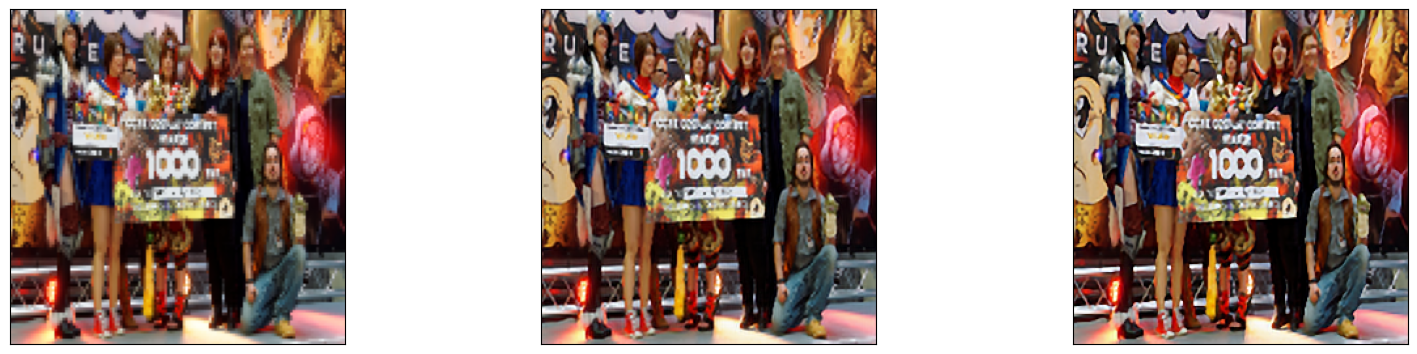

(256, 256, 3)
(256, 256, 3)


In [ ]:


# x = load_model("enhance.h5")
# predictions = autoencoder.predict(val_x_px)
# predictions2 = x.predict(predictions)
n = 1
j=0
plt.figure(figsize= (40,20))
for i in range(n):
  j +=1
  ax = plt.subplot(4, 6 , j)
  plt.imshow(val_x_px[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  j +=1
  ax = plt.subplot(4, 6, j)
  plt.imshow(predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  j +=1
  ax = plt.subplot(4, 6, j)
  plt.imshow(predictions2[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

print(predictions[0].shape)
print(predictions2[0].shape)

In [ ]:
face_images = sorted(glob.glob('/content/*.jpg'))

def read(path):
  img = load_img(path, target_size=(128,128,3))
  img = img_to_array(img)
  img = img/255.
  # progress.update(1)
  return img
p = Pool(10)
img_array = p.map(read, face_images)

img_ =np.array(img_array)

y = load_model("enhance.h5")
z = load_model("upscale_dvi2k.h5")
x = load_model("scratch_rem2.h5")


a = x.predict(img_)
b = z.predict(a)
c = y.predict(b)


1/1 [==============================] - 0s 473ms/step


In [ ]:
cp /content/drive/MyDrive/personal/scratch_rem2.h5  /content/

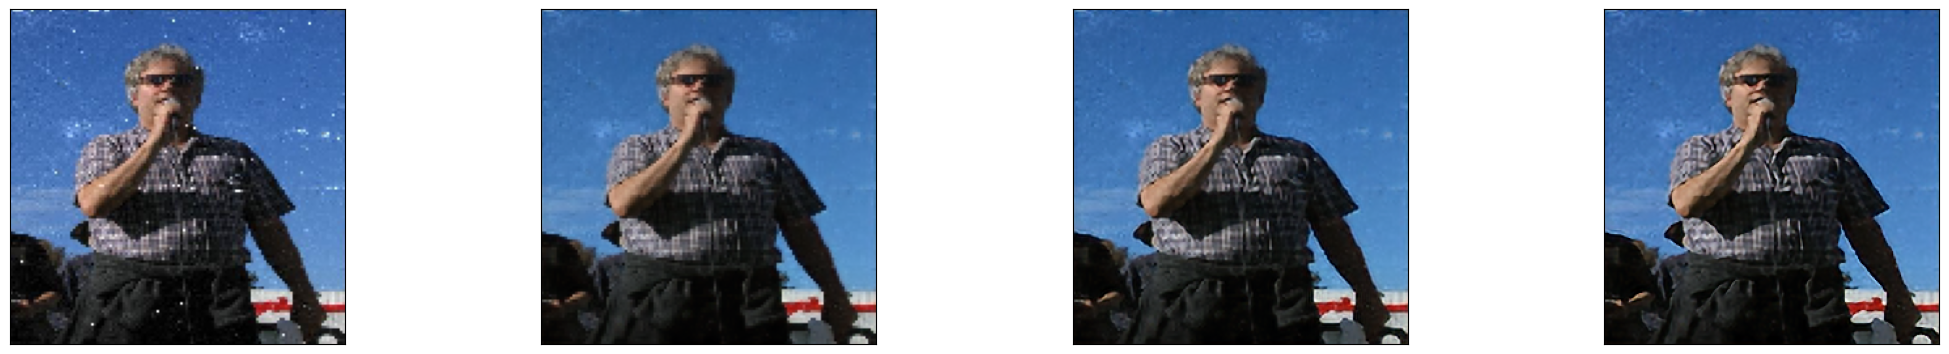

In [ ]:
j =1
i = 0
plt.figure(figsize= (40,20))
ax = plt.subplot(4, 6 , j)
plt.imshow(img_[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
j +=1
ax = plt.subplot(4, 6, j)
plt.imshow(a[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
j +=1
ax = plt.subplot(4, 6, j)
plt.imshow(b[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
j +=1
ax = plt.subplot(4, 6, j)
plt.imshow(c[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from skimage import metrics

mse_skimg = 0
psnr_skimg = 0
rmse_skimg = 0

for i in range(len(final)):
    mse_skimg = mse_skimg + metrics.mean_squared_error(final[i], train_x[i])
    psnr_skimg = psnr_skimg + metrics.peak_signal_noise_ratio(final[i], train_x[i], data_range=len(final))
    rmse_skimg = rmse_skimg + metrics.normalized_root_mse(final[i], train_x[i])

mse_avg = mse_skimg/len(final)
psnr_avg = psnr_skimg/len(final)
rmse_avg = rmse_skimg/len(final)

print("MSE: Average = ", mse_avg)
print("PSNR: Average = ", psnr_avg)
print("RMSE: Average = ", rmse_avg)

MSE: Average =  0.003592418881090381
PSNR: Average =  80.69585547983678
RMSE: Average =  0.1204029660336788
